<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/kecerdasan%20komputasional/Kecerdasan_Komputasional_B_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv')
df_raw.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3639,61475,Female,51.0,1,0,Yes,Private,Rural,85.84,31.8,never smoked,0
4899,70267,Male,65.0,0,0,Yes,Private,Rural,198.84,33.2,formerly smoked,0
2570,67667,Female,72.0,1,0,Yes,Self-employed,Rural,112.12,30.5,never smoked,0
4416,65729,Female,26.0,0,0,Yes,Private,Rural,123.98,30.1,never smoked,0
1696,19239,Female,50.0,0,0,Yes,Govt_job,Urban,104.24,32.8,Unknown,0
830,65218,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
4158,56450,Male,25.0,0,0,No,Private,Rural,65.36,24.7,never smoked,0
1184,28326,Female,79.0,0,0,Yes,Private,Urban,65.59,28.1,never smoked,0
521,17242,Male,67.0,0,0,Yes,Self-employed,Urban,68.52,26.2,never smoked,0
435,3355,Female,64.0,0,0,Yes,Private,Urban,82.34,31.9,never smoked,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df = df_raw.copy()

In [ ]:
del df['id']

## Missing value

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Outlier

In [ ]:
num_feats = df.dtypes[(df.dtypes == 'float')].index
num_feats

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

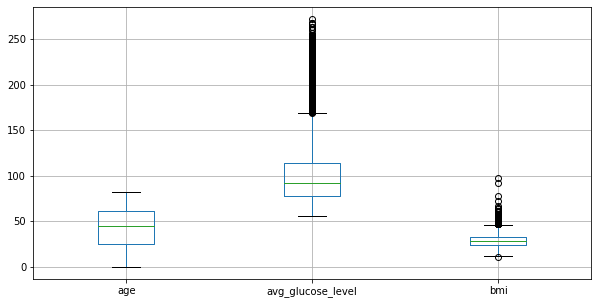

In [ ]:
plt.figure(figsize = (10, 5))
df[num_feats].boxplot()

In [ ]:
while True:
  Q1 = df[num_feats].quantile(.25)
  Q3 = df[num_feats].quantile(.75)
  IQR = Q3 - Q1

  df[num_feats] = df[num_feats][~((df[num_feats] < Q1 - (1.5 * IQR)) | (df[num_feats] > Q3 + (1.5 * IQR)))]
  
  if (df.isnull().sum().sum() != 0):
    df.dropna(inplace = True)
  else:
    break

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.dropna(inplace = True)

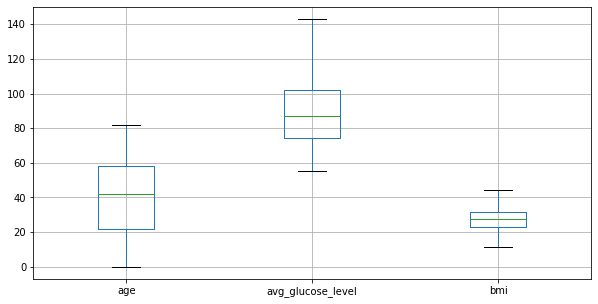

In [ ]:
plt.figure(figsize = (10, 5))
df[num_feats].boxplot()

## Duplicates

In [ ]:
df.duplicated().sum()

0

## Correlation

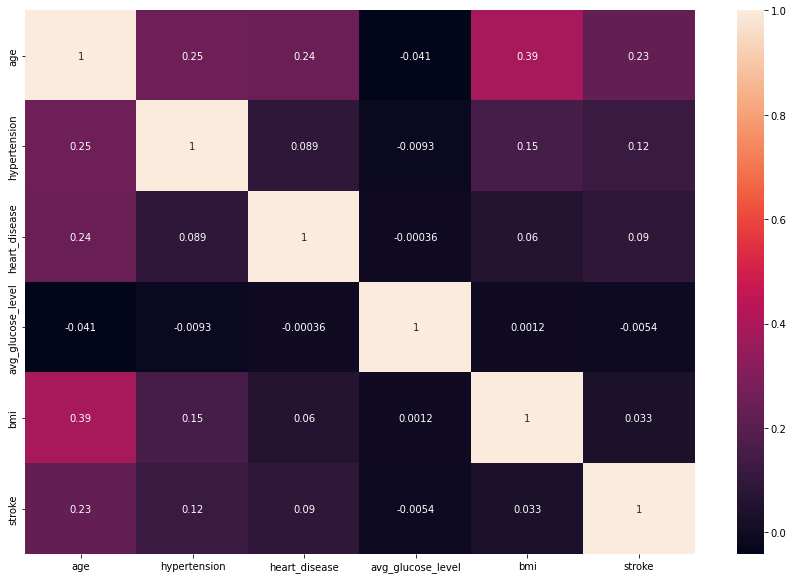

In [ ]:
corr = df.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

## Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
LE = LabelEncoder()

obj_feats = df.dtypes[df.dtypes == 'object'].index

for col in obj_feats:
  df[col] = LE.fit_transform(df[col])

In [ ]:
X = df.drop('stroke', axis = 1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = GNB.predict(X_test)

print('Accuracy Score : ', accuracy_score(y_pred, y_test), '\n')
print('Confussion Matrix : \n', confusion_matrix(y_pred, y_test))

Accuracy Score :  0.8797619047619047 

Confussion Matrix : 
 [[728  29]
 [ 72  11]]
